# SALib Validation Files
This outputs files from SALib sobol analysis with Ishigami function.

## Set Up

In [1]:
# LOCALLY
 
# pip install SALib
# pip install numpy
# pip install scipy
# pip install matplotlib

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from scipy.stats import norm

from SALib.test_functions import Ishigami
import numpy as np
import csv
import math

#extra plotting
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
# SHORT EXAMPLE

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

# Generate samples
param_values = saltelli.sample(problem, 1000, calc_second_order = True)

# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

# Print the first-order sensitivity indices
print (Si['S1'])

          ST   ST_conf
x1  0.554345  0.088280
x2  0.437537  0.039481
x3  0.245577  0.025803
          S1   S1_conf
x1  0.312346  0.067640
x2  0.442994  0.059930
x3  0.009031  0.059942
                S2   S2_conf
(x1, x2)  0.010274  0.084459
(x1, x3)  0.237711  0.099485
(x2, x3) -0.014603  0.071348
[0.31234581 0.44299361 0.00903086]


/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [4]:
# CONFIDENCE INTERVALS

print (Si['S1_conf'])
print (Si['ST_conf'])
print ()
print (Si['S2_conf'])

[0.06763971 0.05993007 0.05994153]
[0.08828033 0.03948141 0.02580332]

[[       nan 0.08445945 0.09948537]
 [       nan        nan 0.0713477 ]
 [       nan        nan        nan]]


### 1. Sampling

`SALib.sample.saltelli.sample(problem, N, calc_second_order=True, seed=None)`

Generates model inputs using Saltelli’s extension of the Sobol sequence.

Returns a NumPy matrix containing the model inputs using Saltelli’s sampling scheme. Saltelli’s scheme extends the Sobol sequence in a way to reduce the error rates in the resulting sensitivity index calculations. If `calc_second_order` is `False`, the resulting matrix has N * (D + 2) rows, where D is the number of parameters. If `calc_second_order` is True, the resulting matrix has N * (2D + 2) rows. These model inputs are intended to be used with `SALib.analyze.sobol.analyze()`.

Parameters:	
- problem (dict) – The problem definition
- N (int) – The number of samples to generate
- calc_second_order (bool) – Calculate second-order sensitivities (default True)

In [5]:
# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

N = 1000
D = problem['num_vars']

In [6]:
# Get the sobol-sequence intermediate
from SALib.sample import sobol_sequence
sample = sobol_sequence.sample(N, 3)
sample

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       ],
       [0.75      , 0.25      , 0.25      ],
       ...,
       [0.90722656, 0.65917969, 0.33105469],
       [0.65722656, 0.40917969, 0.58105469],
       [0.15722656, 0.90917969, 0.08105469]])

In [7]:
path = "../data/sobol/py_ishigami/py_sobolseq.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(sample)

In [8]:
# Generate samples
param_values = saltelli.sample(problem, N, calc_second_order=True, skip_values = 1000)
param_values

/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:111: UserWarning: 
            Convergence properties of the Sobol' sequence is only valid if
            `skip_values` (1000) is a power of 2.
            
  warnings.warn(msg)


array([[-1.76100994, -2.53413626,  0.11658254],
       [ 1.11060209, -2.53413626,  0.11658254],
       [-1.76100994, -1.38058271,  0.11658254],
       ...,
       [-0.05215535,  0.7025632 ,  1.48182544],
       [-0.05215535,  1.89906822, -2.29790322],
       [-0.05215535,  1.89906822,  1.48182544]])

In [9]:
# print csv for comparison
path = "../data/sobol/py_ishigami/py_samples.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(param_values)


### Sampling - Plotting

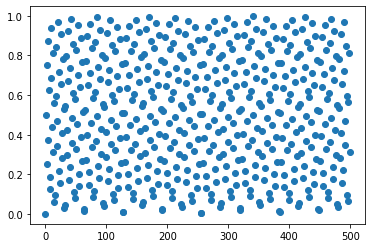

In [10]:
#distribution of SALib sobol_sequence values
sobol_sample = {'id': range(500), 'x1': sample[0:500,0], 'x2': sample[0:500,1], 'x3': sample[0:500,2]}
df = pd.DataFrame(sobol_sample)
plt.scatter(df['id'], df['x1'])
plt.show()

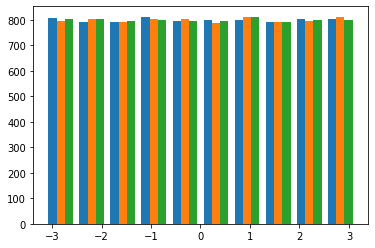

In [11]:
plt.hist(param_values)
plt.show()

### 2. Analyze

`SALib.analyze.sobol.analyze(problem, Y, calc_second_order=True, num_resamples=100, conf_level=0.95, print_to_console=False, parallel=False, n_processors=None, seed=None)`

Perform Sobol Analysis on model outputs.

Returns a dictionary with keys ‘S1’, ‘S1_conf’, ‘ST’, and ‘ST_conf’, where each entry is a list of size D (the number of parameters) containing the indices in the same order as the parameter file. If calc_second_order is True, the dictionary also contains keys ‘S2’ and ‘S2_conf’.

Parameters:	
- problem (dict) – The problem definition
- Y (numpy.array) – A NumPy array containing the model outputs
- calc_second_order (bool) – Calculate second-order sensitivities (default True)
- num_resamples (int) – The number of resamples (default 100)
- conf_level (float) – The confidence interval level (default 0.95)
- print_to_console (bool) – Print results directly to console (default False)

In [12]:
# Run model (example)
Y = Ishigami.evaluate(param_values)

In [13]:
# print csv for comparison
path = "../data/sobol/py_ishigami/py_ishigami.csv"

with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(Y)):
        wr.writerow([Y[i]])

In [14]:
# get intermediate matrices for testing
def separate_output_values(Y, D, N, calc_second_order):
    AB = np.zeros((N, D))
    BA = np.zeros((N, D)) if calc_second_order else None
    step = 2 * D + 2 if calc_second_order else D + 2

    A = Y[0:Y.size:step]
    B = Y[(step - 1):Y.size:step]
    for j in range(D):
        AB[:, j] = Y[(j + 1):Y.size:step]
        if calc_second_order:
            BA[:, j] = Y[(j + 1 + D):Y.size:step]

    return A,B,AB,BA

A,B,AB,BA = separate_output_values(Y, D, N, calc_second_order=True)

In [15]:
# print csv for comparison

path = "../data/sobol/py_ishigami/py_A.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(A)):
        wr.writerow([A[i]])
    
    
path = "../data/sobol/py_ishigami/py_B.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(B)):
        wr.writerow([B[i]])
    
    
path = "../data/sobol/py_ishigami/py_AB.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(AB)
        
path = "../data/sobol/py_ishigami/py_BA.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(BA)

In [16]:
# CI stuff

num_resamples = 10000
conf_level = 0.95

print("shape of A is", A.shape)
print("shape of B is", B.shape)
print("shape of AB is", AB.shape)
print("shape of BA is", BA.shape)

r = np.random.randint(N, size=(N, num_resamples))
Z = norm.ppf(0.5 + conf_level / 2)

print()
print("shape of r is", r.shape)

print("shape of A[r] is", A[r].shape)
print("shape of B[r] is", B[r].shape)
print("shape of AB[r, 1] is", AB[r, 1].shape)

firstorder = sobol.first_order(A[r], AB[r,1], B[r])
print("shape of firstorder is", firstorder.shape)

ci = Z * firstorder.std(ddof=1)

print(sobol.first_order(A, AB[:,1], B).shape)
print(sobol.first_order(A[r], AB[r,1], B[r]).shape)

shape of A is (1000,)
shape of B is (1000,)
shape of AB is (1000, 3)
shape of BA is (1000, 3)

shape of r is (1000, 10000)
shape of A[r] is (1000, 10000)
shape of B[r] is (1000, 10000)
shape of AB[r, 1] is (1000, 10000)
shape of firstorder is (10000,)
()
(10000,)


In [17]:
# Perform analysis
Si = sobol.analyze(problem, Y, calc_second_order=True, print_to_console=True, num_resamples = 10000)
print(Si['S1'])
print(Si['S1_conf'])
print()
print()
print(Si['S2'])
print(Si['S2_conf'])

          ST   ST_conf
x1  0.560137  0.087713
x2  0.438722  0.040700
x3  0.242845  0.026283
          S1   S1_conf
x1  0.307975  0.063797
x2  0.447767  0.054140
x3 -0.004255  0.058176
                S2   S2_conf
(x1, x2)  0.012205  0.086370
(x1, x3)  0.251526  0.107156
(x2, x3) -0.009954  0.066899
[ 0.30797549  0.44776661 -0.00425452]
[0.06379691 0.05414015 0.05817605]


[[        nan  0.01220462  0.25152574]
 [        nan         nan -0.00995392]
 [        nan         nan         nan]]
[[       nan 0.08637007 0.1071557 ]
 [       nan        nan 0.06689922]
 [       nan        nan        nan]]


In [18]:
# print csv of indices for comparison 
firstorder = Si["S1"]
secondorder = Si["S2"]
totalorder = Si["ST"]

path = "../data/sobol/py_ishigami/py_firstorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder)):
        wr.writerow([firstorder[i]])
        
path = "../data/sobol/py_ishigami/py_secondorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(secondorder)


path = "../data/sobol/py_ishigami/py_totalorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(totalorder)):
        wr.writerow([totalorder[i]])


In [19]:
# print csvs of CIs for comparisons
firstorder_conf = Si["S1_conf"]
secondorder_conf = Si["S2_conf"]
totalorder_conf = Si["ST_conf"]

path = "../data/sobol/py_ishigami/py_firstorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder_conf)):
        wr.writerow([firstorder_conf[i]])
        
path = "../data/sobol/py_ishigami/py_secondorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(secondorder_conf)


path = "../data/sobol/py_ishigami/py_totalorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(totalorder_conf)):
        wr.writerow([totalorder_conf[i]])
        

### Analyze - Plotting 

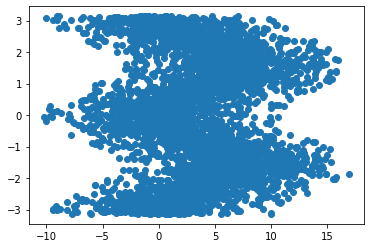

In [20]:
#simple scatter
plt.scatter(Y, param_values[:,1])
plt.show()

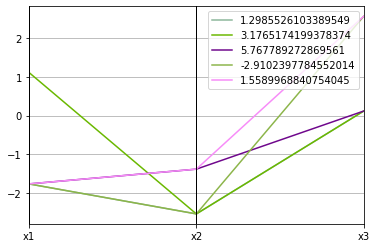

In [21]:
#parallel coordinates (1) 
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/
d = {'output':Y[0:5], 'x1': param_values[0:5,0], 'x2': param_values[0:5,1], 'x3': param_values[0:5,2]}
df = pd.DataFrame(d)
pd.plotting.parallel_coordinates(df, 'output')

plt.show()

In [22]:
#parallel coordinates (2)
#https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


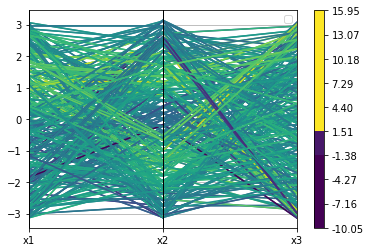

In [23]:
d = {'output':Y[0:500], 'x1': param_values[0:500,0], 'x2': param_values[0:500,1], 'x3': param_values[0:500,2]}
df = pd.DataFrame(d)
parallel_coordinates(df, 'output', colormap="viridis");

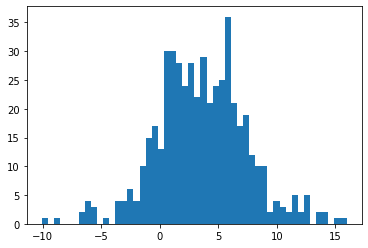

In [24]:
#histogram of output 
plt.hist(df['output'], 50)
plt.show()

## Confidence Intervals

In [25]:
num_resamples = 100
N = 1000
conf_level = 0.95

In [26]:
r = np.random.randint(N, size=(N, num_resamples))
print(r.shape)
print(r)

(1000, 100)
[[469 479 606 ... 847 895 592]
 [290 411   8 ... 269 673 682]
 [664   8 434 ... 837 341 796]
 ...
 [963 436 486 ... 124 382   3]
 [162 656  77 ... 322 717 939]
 [722 536 318 ... 481 143   3]]


In [27]:
Z = norm.ppf(0.5 + conf_level / 2)
print(Z)

1.959963984540054
